In [31]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipw
from scipy import optimize

In [39]:
def func(x, x0, tau = 1.):
    x = x- x0
    return np.exp(-x**2 / tau)


In [50]:
# EXP DATA
x0sol = 2.333
tausol = .1666
x = np.linspace(-10, 10., 1000)
yexp = func(x, x0sol, tausol)  + (np.random.rand(len(x))-.5)*0.1


<IPython.core.display.Javascript object>


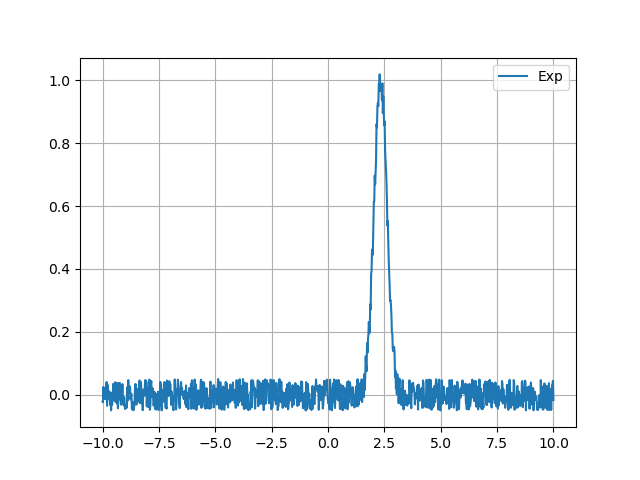

In [51]:
plt.figure()
plt.plot(x, yexp, label = "Exp")
plt.grid()

plt.legend()

<IPython.core.display.Javascript object>


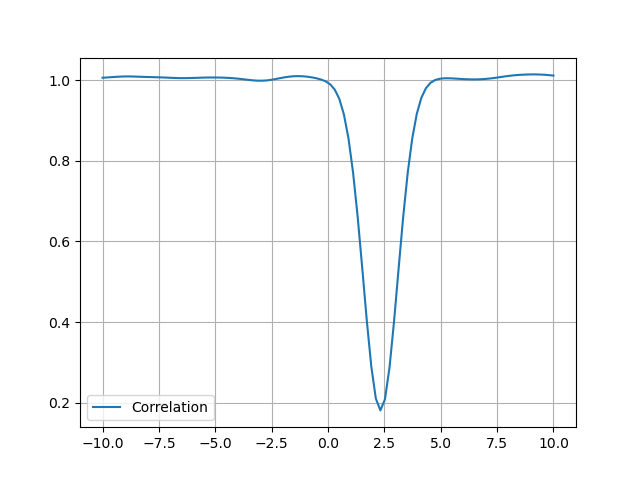

In [52]:
def correlate(y0, y1):
    return 1. - (y0 * y1).sum() / np.sqrt( (y0**2).sum() * (y1**2).sum()  )

def cost(X):
    x0, tau  = X
    y = func(x, x0, tau)
    return correlate(y, yexp)

X0s = np.linspace(-10., 10., 100)
corr = np.array([cost([x0, 1.]) for x0 in X0s])



plt.figure()
plt.plot(X0s, corr, label = "Correlation")
plt.grid()

plt.legend()

In [53]:
sol = optimize.minimize(cost, x0 = [0., 1.])
sol

/home/ludch/miniconda3/envs/env1/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
/home/ludch/miniconda3/envs/env1/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ludch/miniconda3/envs/env1/lib/python3.7/site-packages/numpy/core/_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


      fun: 0.016334678802671587
 hess_inv: array([[ 0.16209938, -0.00476121],
       [-0.00476121,  0.2160368 ]])
      jac: array([-5.57303429e-06, -1.77323818e-06])
  message: 'Optimization terminated successfully.'
     nfev: 118
      nit: 8
     njev: 39
   status: 0
  success: True
        x: array([2.33041211, 0.16456069])

<IPython.core.display.Javascript object>


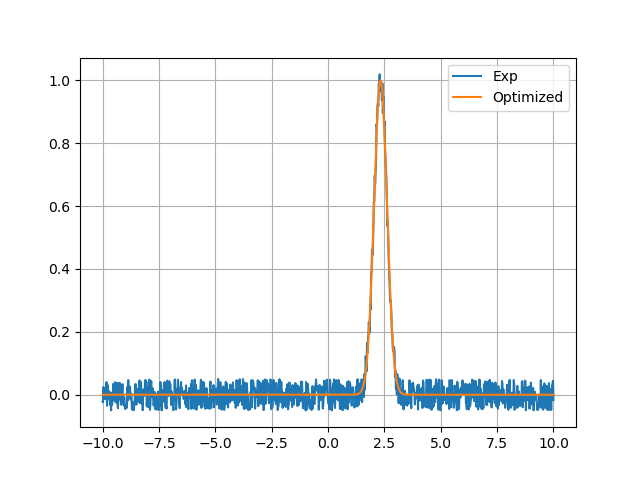

In [54]:
plt.figure()
plt.plot(x, yexp, label = "Exp")
plt.plot(x, func(x,*sol.x), label = "Optimized")
plt.grid()
plt.legend()